# 1. Read The Datasets

In [988]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import seaborn as sns 

df_movies = pd.read_csv("C:/Users/k.bawazer/Documents/IMDb/IMDb movies.csv")
df_ratings = pd.read_csv("C:/Users/k.bawazer/Documents/IMDb/IMDb ratings.csv")

df_movies.info()
df_ratings.info()

C:\Users\k.bawazer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

# 2. Clean The Datasets

In [1006]:
allDollars =df_movies[df_movies.worlwide_gross_income.str.startswith('$') == True]
allDollars.worlwide_gross_income.str.contains('$').value_counts()
allDollars.worlwide_gross_income.str.contains('GBP').value_counts()
df_movies.dropna(subset = ["worlwide_gross_income"], inplace=True)
allDollars =df_movies[df_movies.worlwide_gross_income.str.startswith('$') == True]
allDollars.worlwide_gross_income = allDollars.worlwide_gross_income.str.replace('$', " ").str.strip().astype('float')

year = np.array(allDollars.year, dtype= int)
data_collection = {'imdb_title_id': allDollars.imdb_title_id,'Year': year , 'Genre': allDollars.genre, 'Worlwide_Gross_Income': allDollars.worlwide_gross_income, 'Average_Votes': allDollars.avg_vote}
clean_df_movies = pd.DataFrame(data_collection)
df_merged = pd.merge(clean_df_movies, df_ratings, on= "imdb_title_id")

data2 = {'Year': [2000, 2000, 2000, 2010, 2010, 2010], 
 'Genre':['Action', 'Action', 'Comedy', 'Comedy', 'Drama', 'Drama'],
 'Worlwide Gross Income': [ActionGroos00, ActionGroos10, ComedyGroos00, ComedyGroos10, DramaGroos00, DramaGroos10]}
df_merged.head()

<ipython-input-1006-3cc2db58a71a>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  allDollars.worlwide_gross_income = allDollars.worlwide_gross_income.str.replace('$', " ").str.strip().astype('float')
C:\Users\k.bawazer\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,imdb_title_id,Year,Genre,Worlwide_Gross_Income,Average_Votes,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0007183,1916,"Drama, Fantasy, Horror",144968.0,7.0,7.0,610,6.8,7.0,91,...,7.2,35.0,7.9,48.0,5.9,66.0,6.7,135.0,7.0,345.0
1,tt0010323,1920,"Fantasy, Horror, Mystery",8811.0,8.1,8.1,55601,7.9,8.0,11426,...,8.2,3807.0,8.1,1341.0,7.5,559.0,8.0,13136.0,8.1,25399.0
2,tt0011440,1921,Drama,4272.0,6.6,6.6,195,6.4,7.0,14,...,6.6,9.0,6.4,7.0,6.4,40.0,6.7,15.0,6.6,135.0
3,tt0011741,1920,"Comedy, Drama, Romance",772155.0,6.3,6.3,210,6.7,7.0,19,...,6.5,20.0,5.4,12.0,5.8,28.0,6.5,96.0,5.7,72.0
4,tt0012190,1921,"Drama, Romance, War",9183673.0,7.2,7.2,3058,7.8,8.0,943,...,7.3,218.0,7.6,411.0,6.6,174.0,7.3,1537.0,7.0,950.0


In [1007]:
temp = df_merged.copy()
temp['Genre_1'] =np.array( df_merged.Genre.str.split(','))
temp['Genre_1'] =[i[0] for i in temp['Genre_1']]

genre_replacing = {'Genre_1':
                   {'Action': 1, 'Comedy': 2, 'Drama': 3, 'Fantasy': 4, 'Horror': 5, 
                    'Mystery': 6, 'Romance': 7, 'Thriller': 8,  'Western': 9, 'Animation': 10, 
                    'Adventure': 11, 'Crime': 12, 'Biography': 13, 'Musical': 14, 'Film-Noir': 15,
                    'War': 16, 'Sci-Fi': 17, 'Family': 18, 'Documentary': 19, 'Music': 20, 'History': 21, 'Sport': 22}} 

GenreArr= np.array(['Action','Comedy','Drama','Fantasy','Horror','Mystery','Romance','Thriller','Western'])

temp = temp.replace(genre_replacing)
    
    
# temp['N_Genre2'] =[i[1] for i in np.array(df_merged.Genre.str.split(','))]
# temp['N_Genre3'] =[i[2] for i in np.array(df_merged.Genre.str.split(','))]
temp.head()

,imdb_title_id,Year,Genre,Worlwide_Gross_Income,Average_Votes,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,...,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,Genre_1
0,tt0007183,1916,"Drama, Fantasy, Horror",144968.0,7.0,7.0,610,6.8,7.0,91,...,35.0,7.9,48.0,5.9,66.0,6.7,135.0,7.0,345.0,3
1,tt0010323,1920,"Fantasy, Horror, Mystery",8811.0,8.1,8.1,55601,7.9,8.0,11426,...,3807.0,8.1,1341.0,7.5,559.0,8.0,13136.0,8.1,25399.0,4
2,tt0011440,1921,Drama,4272.0,6.6,6.6,195,6.4,7.0,14,...,9.0,6.4,7.0,6.4,40.0,6.7,15.0,6.6,135.0,3
3,tt0011741,1920,"Comedy, Drama, Romance",772155.0,6.3,6.3,210,6.7,7.0,19,...,20.0,5.4,12.0,5.8,28.0,6.5,96.0,5.7,72.0,2
4,tt0012190,1921,"Drama, Romance, War",9183673.0,7.2,7.2,3058,7.8,8.0,943,...,218.0,7.6,411.0,6.6,174.0,7.3,1537.0,7.0,950.0,3


# 3. Modeling

In [1052]:
genrenum = np.array(temp.Genre_1, dtype= int)
data = {'Year': df_merged.Year,'Genre': genrenum,'Gross': df_merged.Worlwide_Gross_Income, 'Total_Votes': df_merged.total_votes}
df = pd.DataFrame(data)
df

,Year,Genre,Gross,Total_Votes
0,1916,3,144968.0,610
1,1920,4,8811.0,55601
2,1921,3,4272.0,195
3,1920,2,772155.0,210
4,1921,3,9183673.0,3058
...,...,...,...,...
30950,2019,3,4791.0,494
30951,2020,2,3507171.0,398
30952,2020,2,7299062.0,724
30953,2019,3,2833.0,194


### 3.1 Clustring 

In [1087]:
X = df.drop(columns='Genre')
y = df.Genre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

knn = KNeighborsClassifier(n_neighbors=2)
km = KMeans( n_clusters= 4,
            init = 'k-means++',
            max_iter = 150,
            random_state = 42 
           )
knn.fit(X_train, y_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)

y_km = km.fit_predict(X)

The score for kNN is
Training:  62.28%
Test set:  28.41%
0


### 3.2 Logistic Regression 

In [1010]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train, y_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

The score for logistic regression is
Training:  17.55%
Test set:  17.43%


C:\Users\k.bawazer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 4. Visualization

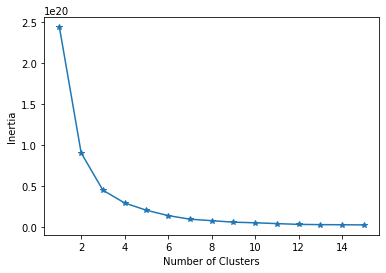

In [1047]:
#Use Visualization to represent & Tune your model

elbows = []
for i in range(1,16):
    km = KMeans(n_clusters= i,#K
            init = 'random',
            max_iter = 150,
            random_state = 42 
           )
    km.fit(X)
#     print(km.inertia_)
    elbows.append(km.inertia_)

plt.plot(range(1,16),  elbows, marker = "*")
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia")
plt.show()

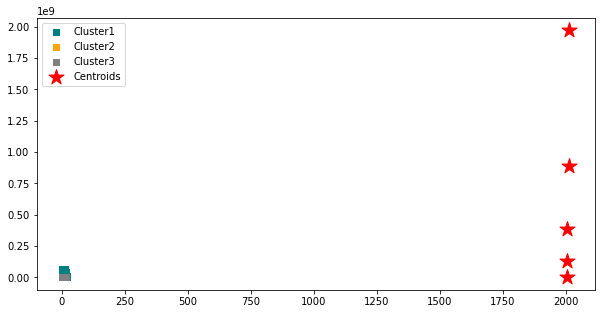

In [1084]:
plt.figure(figsize = [10,5])
plt.scatter(df[y_km== 0]['Genre'], df[y_km==0]['Gross'], 
           c='teal', marker = 's', label = "Cluster1")

plt.scatter(df[y_km==1]['Genre'], df[y_km==1]['Total_Votes'], 
           c='orange', marker = 's', label = "Cluster2")

plt.scatter(df[y_km == 2]['Genre'], df[y_km == 2]['Year'], 
           c='grey', marker = 's', label = "Cluster3")

#Plot the centroids
plt.scatter (km.cluster_centers_[:,0], km.cluster_centers_[:,1],
            marker = '*', label = "Centroids", 
            c = 'red', s = 250)

plt.legend()
plt.show()

<AxesSubplot:xlabel='Genre', ylabel='Density'>

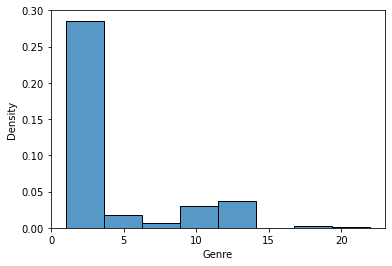

In [897]:
sns.histplot(df.Genre, kde=False,bins=8, stat='density')


<AxesSubplot:xlabel='Genre', ylabel='Density'>

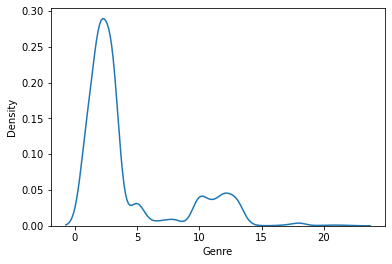

In [927]:
mask = (df.Year > 2009) & (df.Year < 2020)
sns.kdeplot(df.Genre[mask])

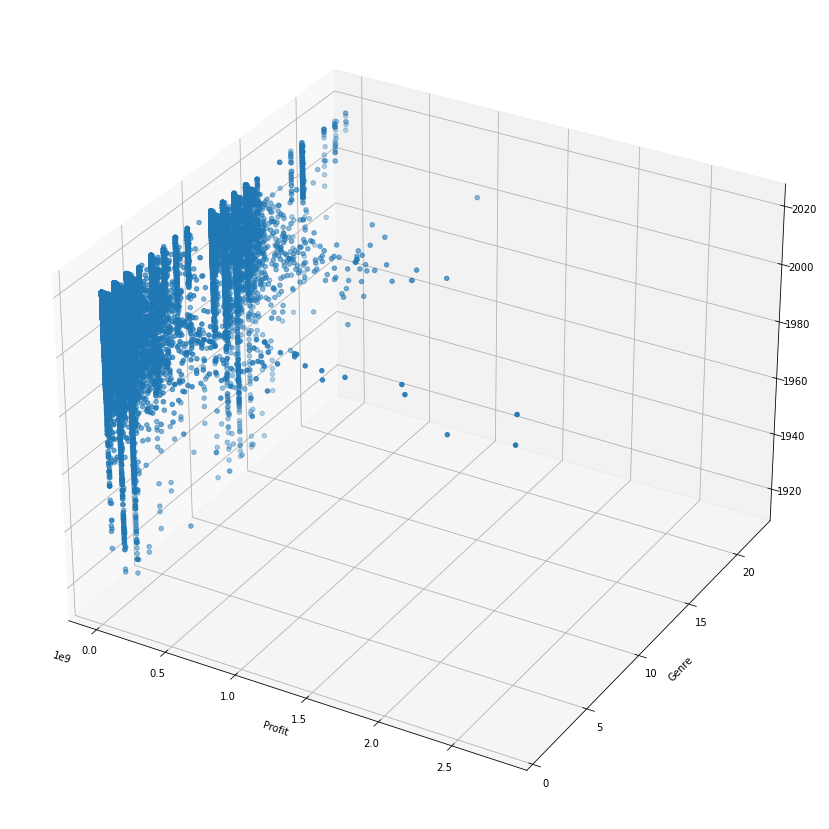

In [1004]:
fig = plt.figure(figsize = [15,15])
ax = plt.axes(projection='3d')

mask = (df.Year > 2009) & (df.Year < 2020)
plt.xlabel("Profit")
plt.ylabel("Genre")
ax.scatter3D(df.Gross, df.Genre, df.Year, 'grey')